# Life Expectancy Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Data Loading and Initial Exploration

In [2]:
data = pd.read_csv("Life_Expectancy_Data.csv")

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
print(data.shape)

(2938, 22)


In [5]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [6]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [7]:
print("\nData Types:")
print(data.dtypes)


Data Types:
Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


## 2. Exploratory Data Analysis (EDA)

**GDP vs. Life Expectancy:**

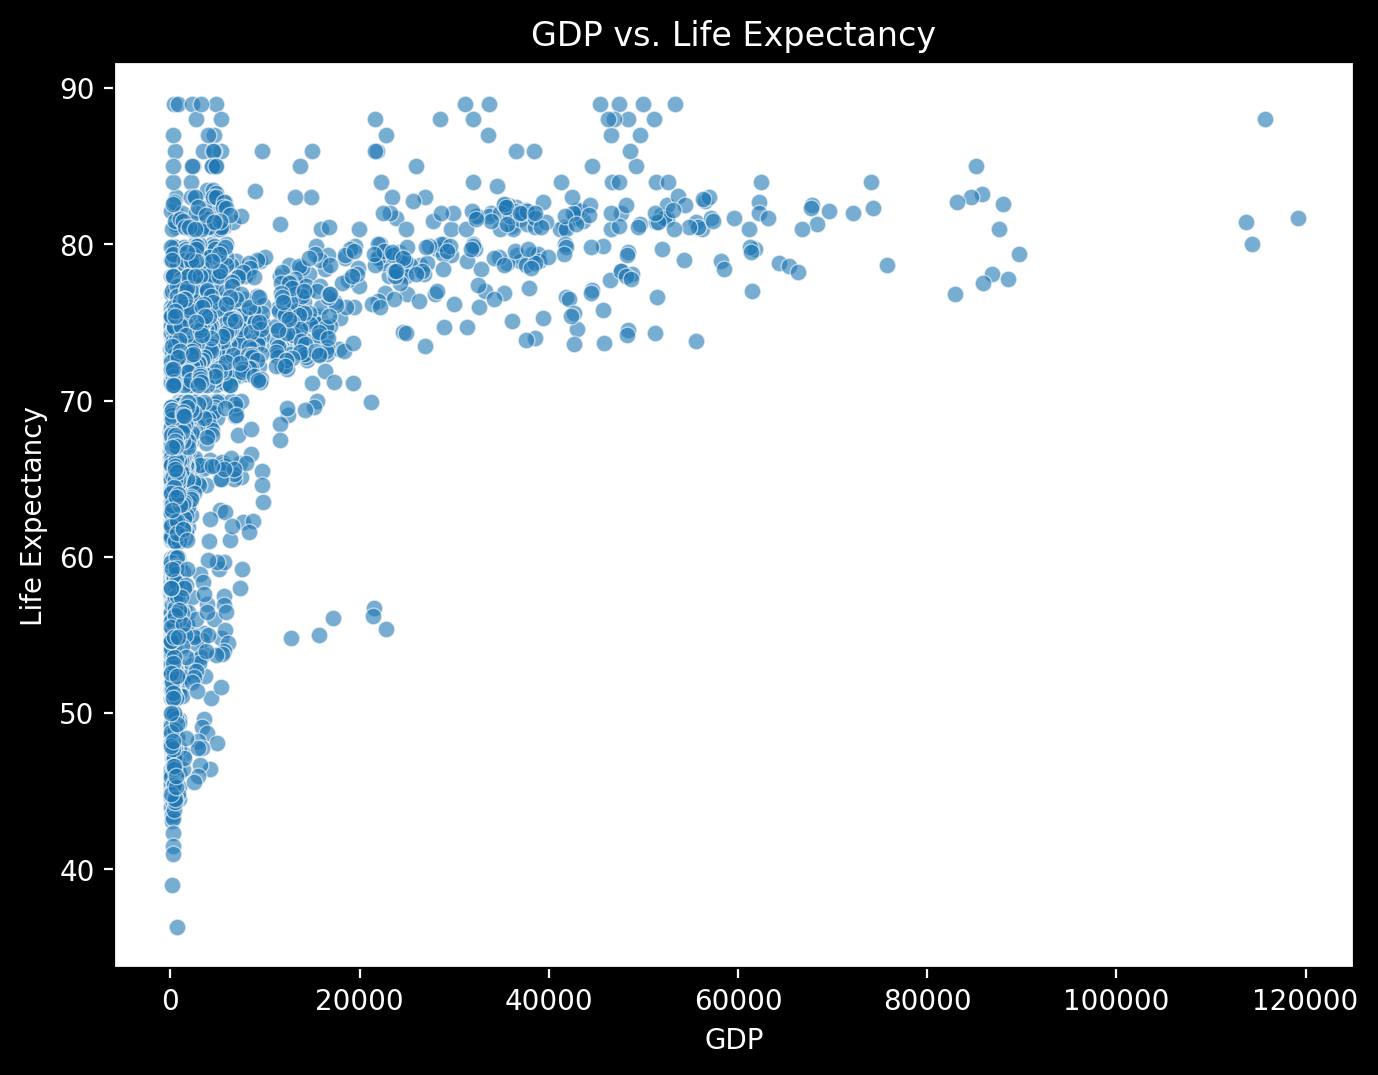

In [11]:
plt.figure(figsize=(8, 6), dpi=200)

# Arka plan rengini siyah yapın
plt.gcf().patch.set_facecolor('black')  # Tüm figür

sns.scatterplot(x=data['GDP'], y=data['Life expectancy '], alpha=0.6)
plt.title("GDP vs. Life Expectancy",color='white')
plt.xlabel("GDP",color='white')
plt.ylabel("Life Expectancy",color='white')

# Eksen çizgilerinin ve sayıların rengini beyaz yapın
plt.tick_params(axis='both', colors='white')

plt.savefig("images/gdp_vs_life_expectancy.png")
plt.show()

**Average Life Expectancy by Status:**

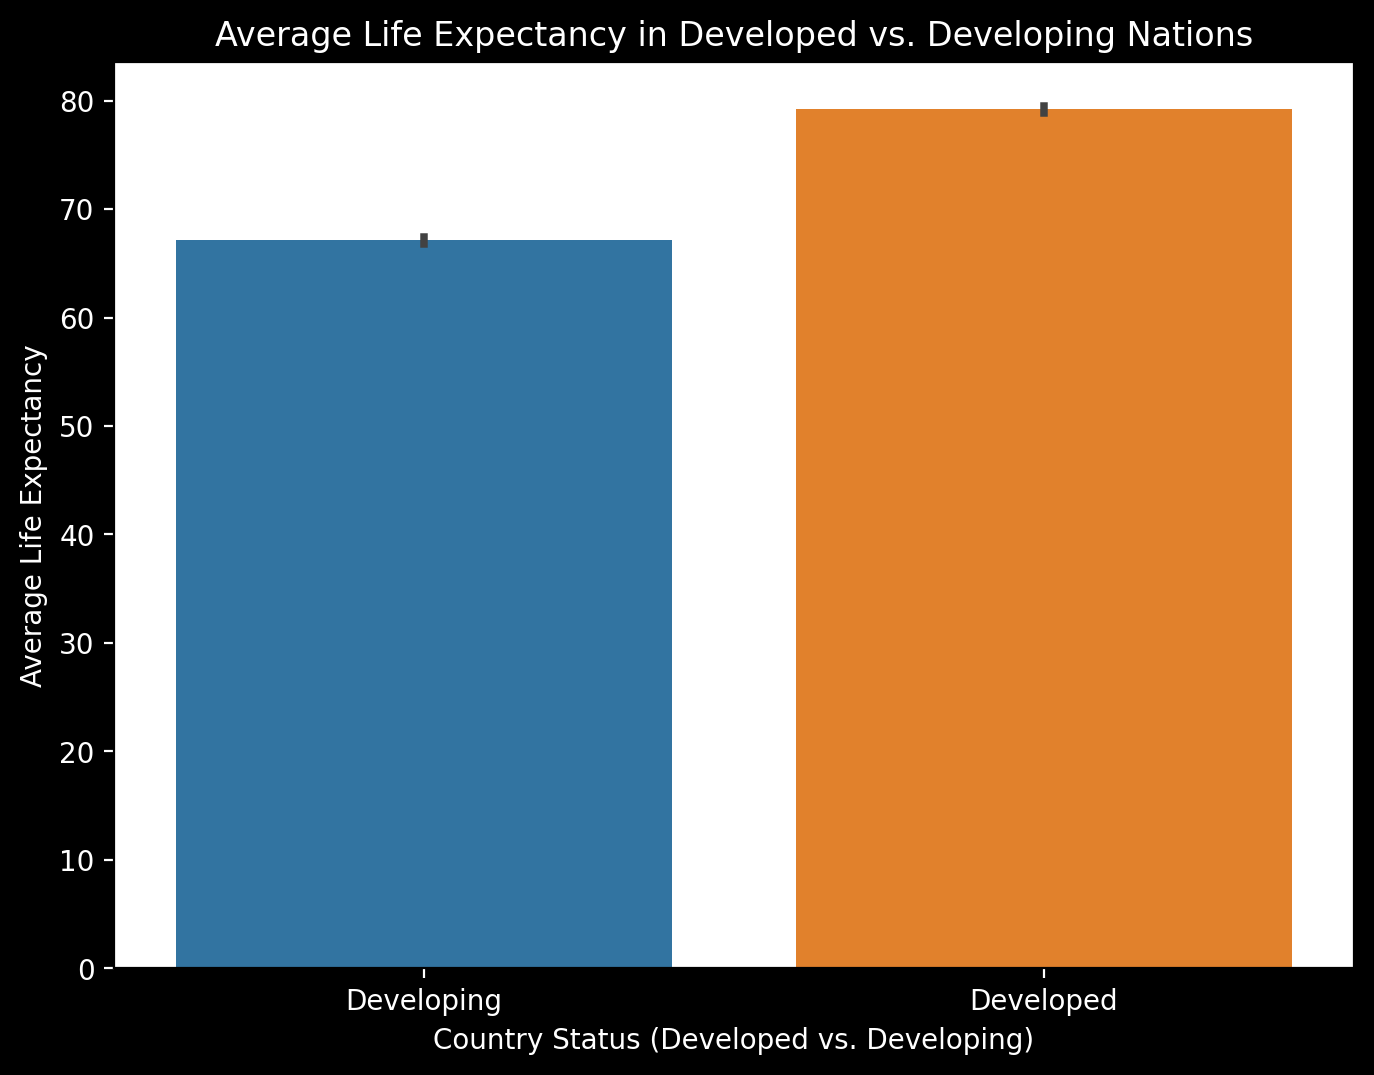

In [12]:
plt.figure(figsize=(8, 6), dpi=200)

# Arka plan rengini siyah yapın
plt.gcf().patch.set_facecolor('black')  # Tüm figür

sns.barplot(x=data['Status'], y=data['Life expectancy '], estimator=np.mean)
plt.title("Average Life Expectancy in Developed vs. Developing Nations", color='white')
plt.xlabel("Country Status (Developed vs. Developing)", color='white')
plt.ylabel("Average Life Expectancy", color='white')

# Eksen çizgilerinin ve sayıların rengini beyaz yapın
plt.tick_params(axis='both', colors='white')

plt.savefig("images/life_expectancy_by_status.png")
plt.show()

**Life Expectancy Trend Over Years:**

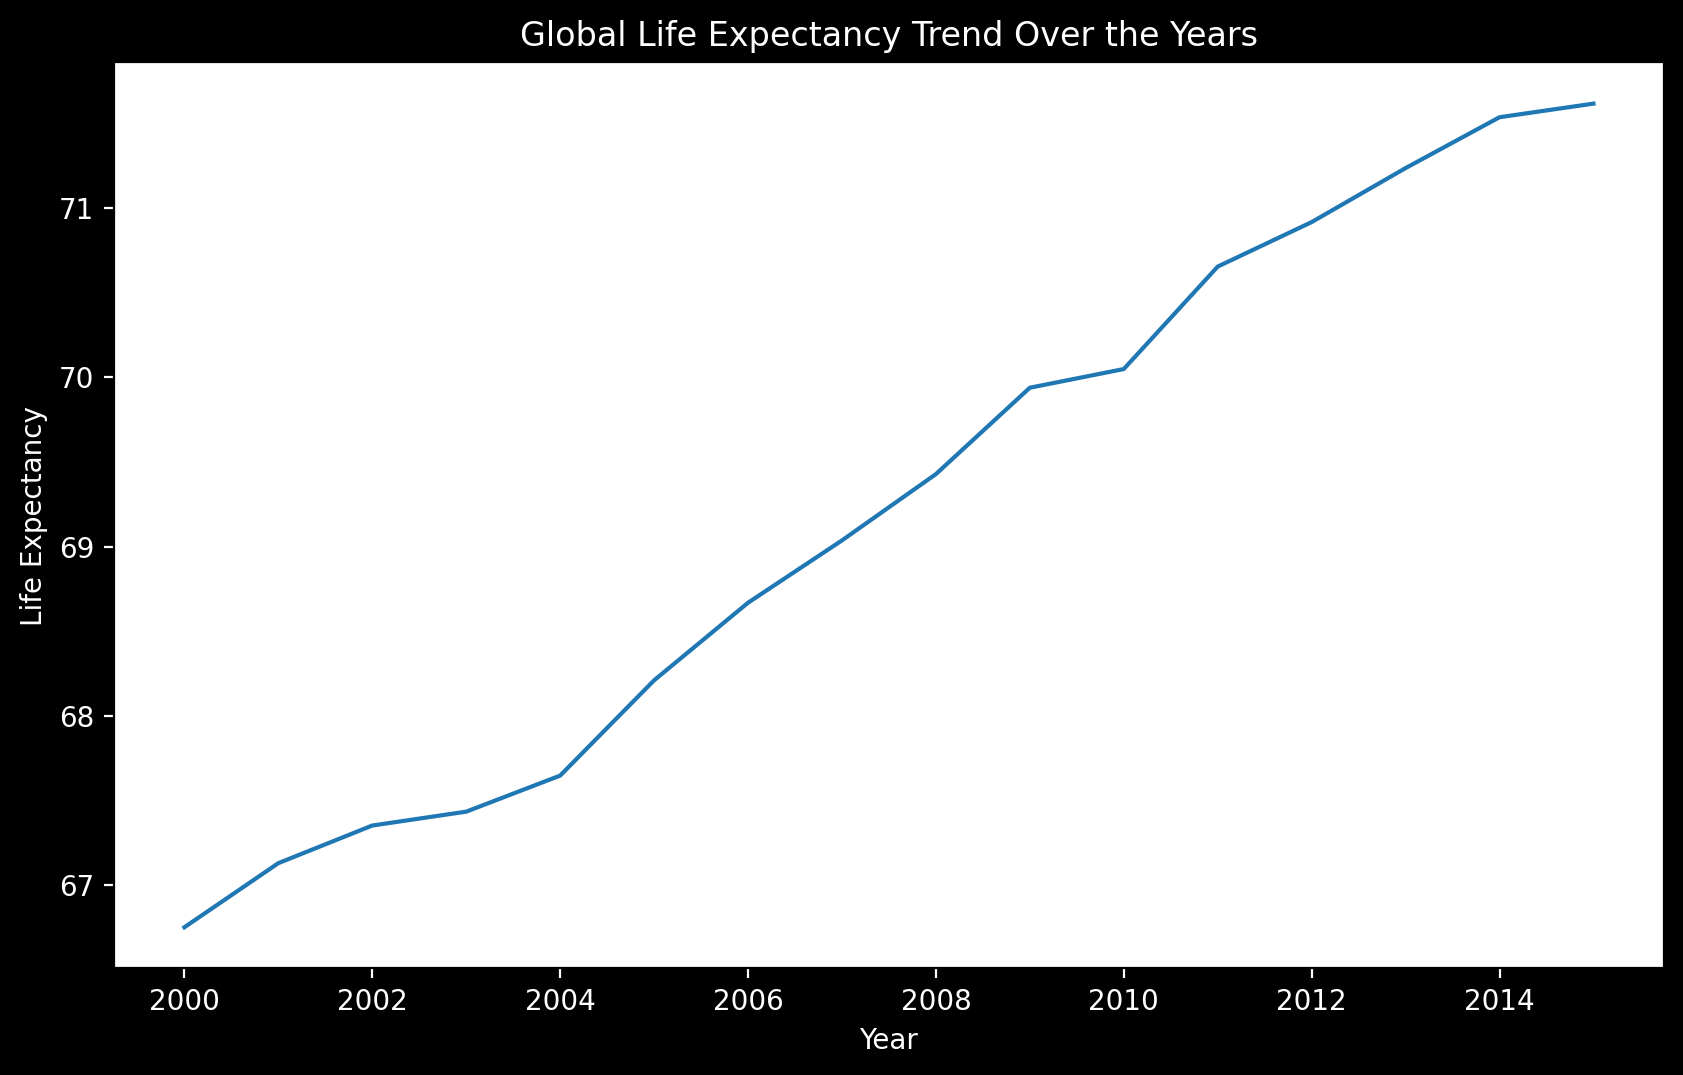

In [13]:
plt.figure(figsize=(10, 6), dpi=200)

# Arka plan rengini siyah yapın
plt.gcf().patch.set_facecolor('black')  # Tüm figür

sns.lineplot(x=data['Year'], y=data['Life expectancy '], ci=None)
plt.title("Global Life Expectancy Trend Over the Years", color='white')
plt.xlabel("Year", color='white')
plt.ylabel("Life Expectancy", color='white')

# Eksen çizgilerinin ve sayıların rengini beyaz yapın
plt.tick_params(axis='both', colors='white')

plt.savefig("images/life_expectancy_trend.png")
plt.show()

**Correlation Heatmap:**

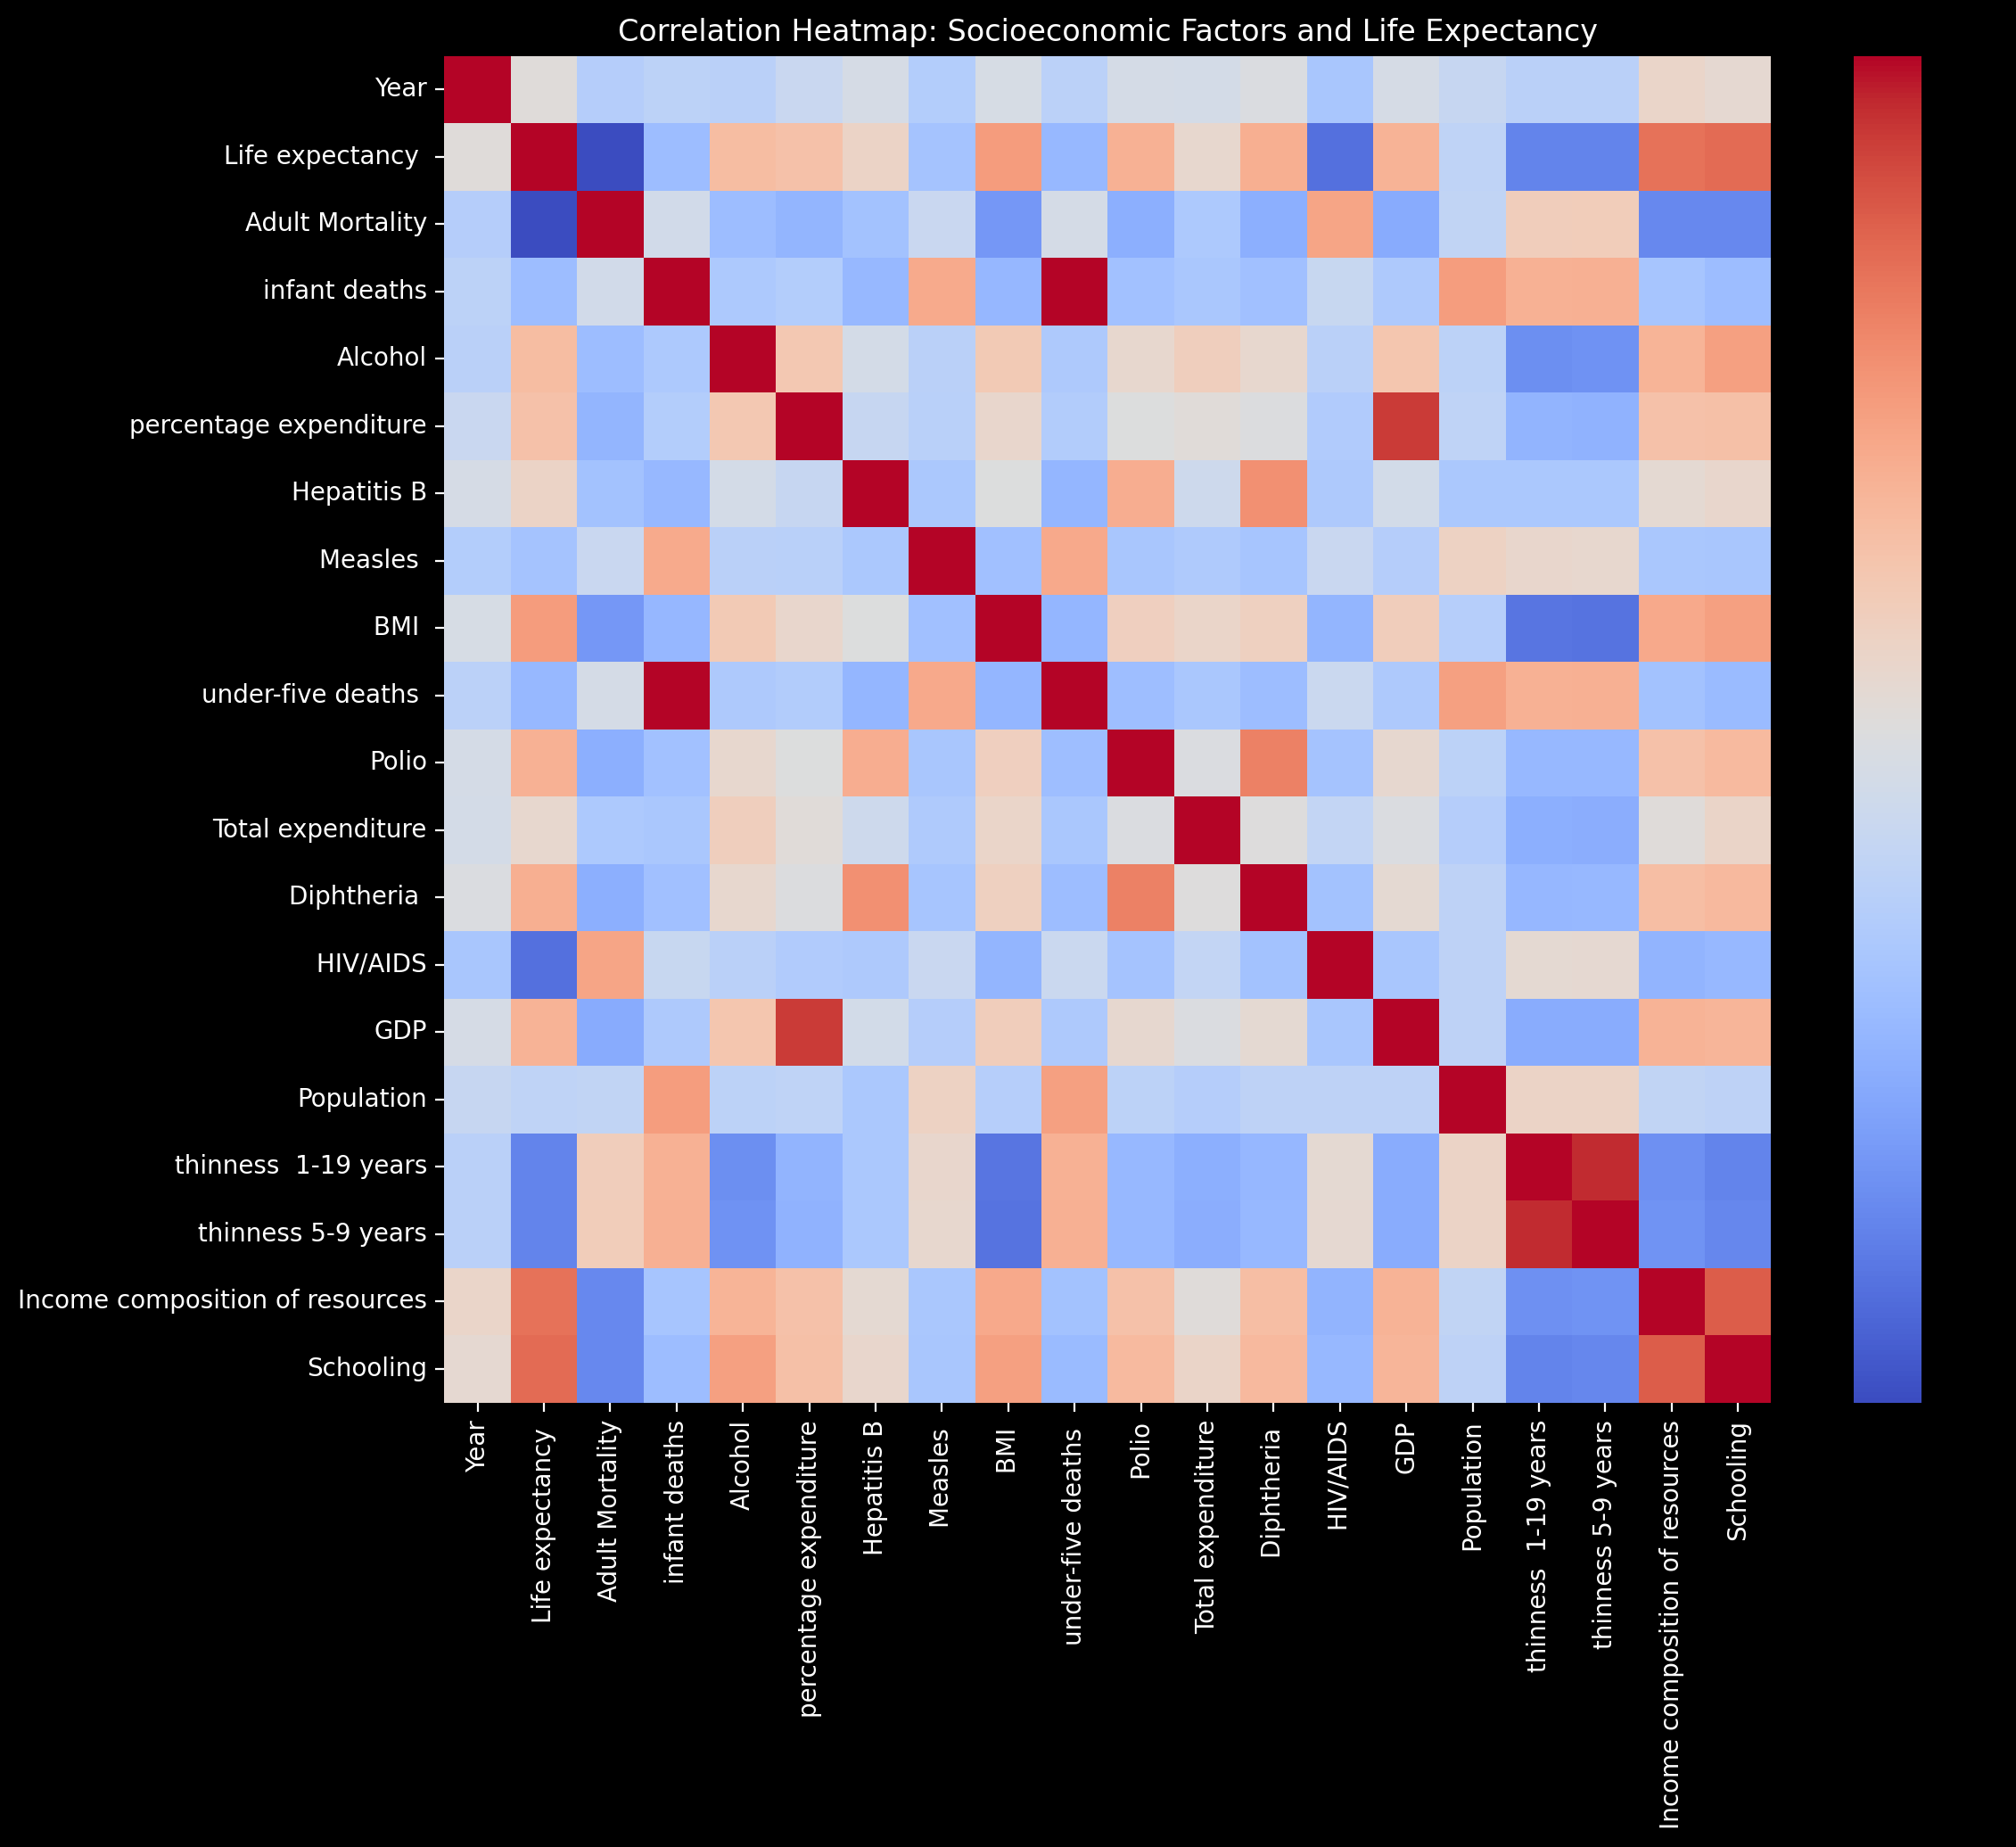

In [14]:
plt.figure(figsize=(12, 10), dpi=200)
correlation_matrix = data.corr()

# Arka plan rengini siyah yapın
plt.gcf().patch.set_facecolor('black')  # Tüm figür

sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap: Socioeconomic Factors and Life Expectancy", color='white')

# Eksen çizgilerinin ve sayıların rengini beyaz yapın
plt.tick_params(axis='both', colors='white')

plt.savefig("images/correlation_heatmap.png")
plt.show()

## 3. Outlier Detection using IQR and Z-Scores

**IQR Method for Outlier Detection**

In [12]:
def detect_outliers_iqr(df, columns):
    outlier_indices = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices[col] = list(outliers)
    return outlier_indices

In [14]:
numeric_columns = data.select_dtypes(include=[np.number]).columns

iqr_outliers = detect_outliers_iqr(data, numeric_columns)
print("\nOutliers detected using IQR:")
for col, indices in iqr_outliers.items():
    print(f"{col}: {len(indices)} outliers")


Outliers detected using IQR:
Year: 0 outliers
Life expectancy : 10 outliers
Adult Mortality: 82 outliers
infant deaths: 315 outliers
Alcohol: 0 outliers
percentage expenditure: 389 outliers
Hepatitis B: 254 outliers
Measles : 542 outliers
 BMI : 0 outliers
under-five deaths : 394 outliers
Polio: 279 outliers
Total expenditure: 32 outliers
Diphtheria : 298 outliers
 HIV/AIDS: 542 outliers
GDP: 365 outliers
Population: 294 outliers
 thinness  1-19 years: 89 outliers
 thinness 5-9 years: 96 outliers
Income composition of resources: 130 outliers
Schooling: 44 outliers


**Z-Score Method for Outlier Detection**

In [15]:
def detect_outliers_zscore(df, columns, threshold=3):
    outlier_indices = {}
    for col in columns:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        outliers = z_scores[np.abs(z_scores) > threshold].index
        outlier_indices[col] = list(outliers)
    return outlier_indices

In [16]:
zscore_outliers = detect_outliers_zscore(data, numeric_columns)
print("\nOutliers detected using Z-Score:")
for col, indices in zscore_outliers.items():
    print(f"{col}: {len(indices)} outliers")


Outliers detected using Z-Score:
Year: 0 outliers
Life expectancy : 2 outliers
Adult Mortality: 40 outliers
infant deaths: 37 outliers
Alcohol: 3 outliers
percentage expenditure: 84 outliers
Hepatitis B: 18 outliers
Measles : 48 outliers
 BMI : 0 outliers
under-five deaths : 34 outliers
Polio: 172 outliers
Total expenditure: 25 outliers
Diphtheria : 170 outliers
 HIV/AIDS: 69 outliers
GDP: 69 outliers
Population: 14 outliers
 thinness  1-19 years: 53 outliers
 thinness 5-9 years: 57 outliers
Income composition of resources: 0 outliers
Schooling: 28 outliers


## 4. Handling Missing Data

Only numeric columns contain missing values.

**Median** is chosen to fill these, because it is less sensitive to outliers compared to the mean. However, before filling, we visually inspected for potential outliers using boxplots and validated with **IQR** and **Z-Score** methods.

First, we will calculate missing value percentages.

In [17]:
missing_ratio = data.isnull().sum() / len(data) * 100
print("\nMissing Value Percentages:")
print(missing_ratio)


Missing Value Percentages:
Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                  

In [18]:
data.fillna(data.median(numeric_only=True), inplace=True)

In [19]:
print("\nRemaining Missing Values:", data.isnull().sum().sum())


Remaining Missing Values: 0


## 5. Data Prepation

**Encode categorical variables:** "Country" and "Status" are categorical variables.

"Status" is encoded using **One-Hot Encoding** to avoid introducing ordinal relationships between categories. This ensures that each category is treated independently in the model.

"Country" has many unique values, so it is encoded using **LabelEncoder** to assign a unique numeric value to each country.

In [20]:
data = pd.get_dummies(data, columns=["Status"], drop_first=True)

In [21]:
encoder = LabelEncoder()
data['Country'] = encoder.fit_transform(data['Country'])

We separate the target variable ("Life expectancy ") from the features.

In [22]:
X = data.drop(["Life expectancy "], axis=1)
y = data["Life expectancy "]

**Train-test split:** To evaluate our model's performance, we split the dataset into **training** and **test** sets.

The training set is used to train the model, and the test set is used for evaluation.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Feature scaling:** We use StandardScaler to scale the features so that they have a mean of 0 and a standard deviation of 1.

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6. Model Training and Evaluation

In [25]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
y_pred = model.predict(X_test)

**Evaluation metrics:**

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.07
Mean Squared Error (MSE): 2.77
R² Score: 0.97


**Feature Importance:**

In [29]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

In [15]:
plt.figure(figsize=(10, 6), dpi=200)

sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance", color='white')

# Eksen çizgilerinin ve sayıların rengini beyaz yapın
plt.tick_params(axis='both', colors='white')

plt.savefig("images/feature_importance.png")
plt.show()

NameError: name 'feature_importance_df' is not defined

<Figure size 2000x1200 with 0 Axes>

## 7. Save Model and Results

In [31]:
feature_importance_df.to_csv("feature_importance.csv", index=False)